In [64]:
### Installing GDown to access GoogleDrive

In [65]:
!pip install gdown

In [66]:
!pip install imutils

### Accessing the dataset from the Google Drive

In [67]:
!gdown --id 13hXnqx4RGZtUL2u3V8CU6thsnO8tSR36

#https://drive.google.com/file/d/13hXnqx4RGZtUL2u3V8CU6thsnO8tSR36/view?usp=sharing

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13hXnqx4RGZtUL2u3V8CU6thsnO8tSR36
To: /kaggle/working/FinalDataset-V1-t1.tar
100%|███████████████████████████████████████| 95.4M/95.4M [00:00<00:00, 213MB/s]


In [68]:
!tar -xvf "FinalDataset-V1-t1.tar" -C "/kaggle/working"

content/drive/MyDrive/Final Dataset- V1/
content/drive/MyDrive/Final Dataset- V1/Normal/
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation0-0.02 346.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 097.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 101.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 113.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 068.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 050.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 053.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 079.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 099.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 029.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 105.

In [69]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
import tensorflow as tf
from tqdm import tqdm
#matplotlib.use("Agg")
# import the necessary packages
#from pyimagesearch.resnet import ResNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from skimage import color, io
from tensorflow.keras import layers, Model, utils 
from skimage import color, io
#from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from io import BytesIO
import time
from imutils import paths
import shutil
import itertools
import pandas as pd
from IPython.display import Image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Activation, Dense, Flatten, RepeatVector, Dropout,GlobalAveragePooling2D,GlobalMaxPooling2D

### creating the dataset into correct format

In [70]:
INIT_LR = 1e-1
BS = 8
EPOCHS = 500
IMG_PATH_BASE = "/kaggle/working/content/drive/MyDrive/Final Dataset- V1"
IMG_PATH_NORMAL = IMG_PATH_BASE+'/Normal'
IMG_PATH_ANOMALY = IMG_PATH_BASE+'/Anomaly'

test = os.listdir(IMG_PATH_BASE)
print(test)

print("[INFO] loading images...")
imagePaths_base = list(paths.list_images(IMG_PATH_BASE))
imagePaths_normal = list(paths.list_images(IMG_PATH_NORMAL))
imagePaths_anomaly = list(paths.list_images(IMG_PATH_ANOMALY))


#Defining the image size
vgg_img_width = 224
vgg_img_height = 224
VGG_SHAPE = (vgg_img_width, vgg_img_height,3)

dataset = []
#dataset = np.array([])
labels = []
#labels = np.array([])

['Anomaly', 'Normal']
[INFO] loading images...


#### Summary of the Dataset

In [71]:
print(len(imagePaths_base))
print("Number of data in the normal class")
print(len(imagePaths_normal))
print("Number of data in the anomaly class")
print(len(imagePaths_anomaly))

2511
Number of data in the normal class
2012
Number of data in the anomaly class
499


### Reading Images of Normal Behaviour

In [72]:
for imgP in tqdm(imagePaths_normal):
    
    image_normal = cv2.imread(imgP)
   
    image_normal = cv2.resize(image_normal, (224, 224),interpolation = cv2.INTER_CUBIC)
   
    dataset.append(image_normal)
    labels.append(0)
    
print(labels)

100%|██████████| 2012/2012 [00:07<00:00, 269.22it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#### Reading Images of Anomaly Behaviour

In [73]:
i=0
for imgP in tqdm(imagePaths_anomaly):
    image_anomaly = cv2.imread(imgP)
    image_anomaly =  image_anomaly[0:640,0:640]
    image_anomaly = cv2.resize(image_anomaly, (224, 224),interpolation = cv2.INTER_AREA)
    #image_anomaly =  cropImage(image_anomaly)
    i=i+1
    dataset.append(image_anomaly)
    labels.append(1) 

100%|██████████| 499/499 [00:02<00:00, 169.86it/s]


### Printing the 100th 1400th 2250th 2450th image

print all 4 images of the series

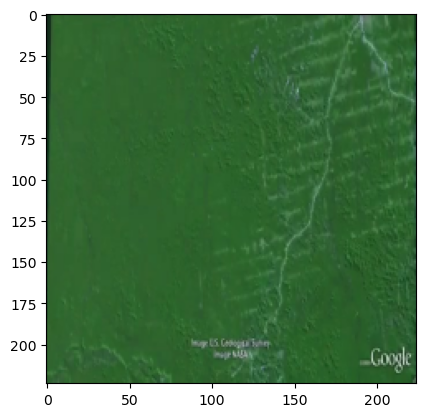

In [74]:
plt.grid(False)
plt.imshow(dataset[2499])

In [75]:
len(dataset)
dataset = np.asarray(dataset)
dataset.shape

len(labels)
labels = np.asarray(labels)
print(labels)
print(dataset.shape)
print (labels.shape)

[0 0 0 ... 1 1 1]
(2511, 224, 224, 3)
(2511,)


## Defining the feature extractor

In [76]:
vgg = tf.keras.applications.VGG16(include_top=False, #to remove the classification layers
                                          weights='imagenet', #trains the model using imagenet weights
                                          input_shape=VGG_SHAPE #define the input shape of the model
                                          )
 
for layer in vgg.layers:
    layer.trainable = False
  #Convert the model into a sequential model
model = Sequential()(vgg.layers[-1].output)
#Add GlobalMaxPooling2D layer for dimension reduction
model = GlobalMaxPooling2D()(model)
model = Model(inputs=vgg.inputs, outputs=model)

In [77]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

#### Adding the clssification layer

In [78]:
VGG16model = Sequential()
VGG16model.add(model)
VGG16model.add(Dense(512, activation='relu', input_dim=(None,512)))
VGG16model.add(Dense(1, activation='sigmoid'))
VGG16model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3 (Functional)        (None, 512)               14714688  
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,977,857
Trainable params: 263,169
Non-trainable params: 14,714,688
_________________________________________________________________


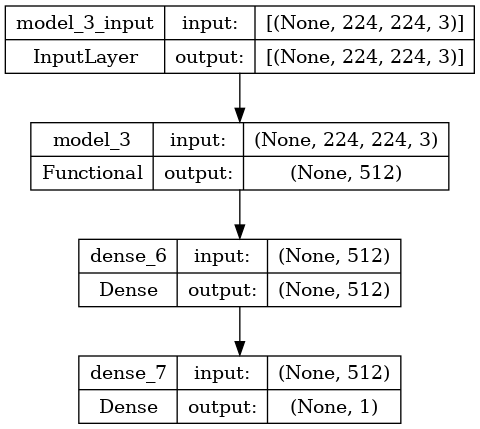

In [79]:
utils.plot_model(VGG16model, show_shapes=True, show_layer_names=True)

### adding weights
weights = compute_class_weight(class_weight ='balanced', classes= np.unique(trainY), y= trainY

In [80]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(class_weight ='balanced', 
                               classes= np.unique(labels),
                               y= labels)


                               
                               
cw = dict(zip( np.unique(labels), weights))
print(cw)

{0: 0.6240059642147118, 1: 2.5160320641282565}


In [81]:
from keras import optimizers
VGG16model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [82]:
history = VGG16model.fit(dataset, labels,class_weight=cw, epochs=3)

Epoch 1/3
79/79 [==============================] - 11s 121ms/step - loss: 0.0986 - accuracy: 0.9725
Epoch 2/3
79/79 [==============================] - 10s 121ms/step - loss: 8.0170e-05 - accuracy: 1.0000
Epoch 3/3
79/79 [==============================] - 10s 121ms/step - loss: 4.7107e-05 - accuracy: 1.0000


### Plot the Training and Vaidation accuracy

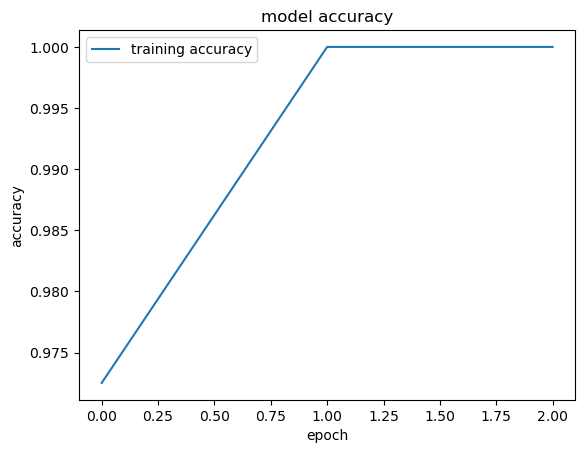

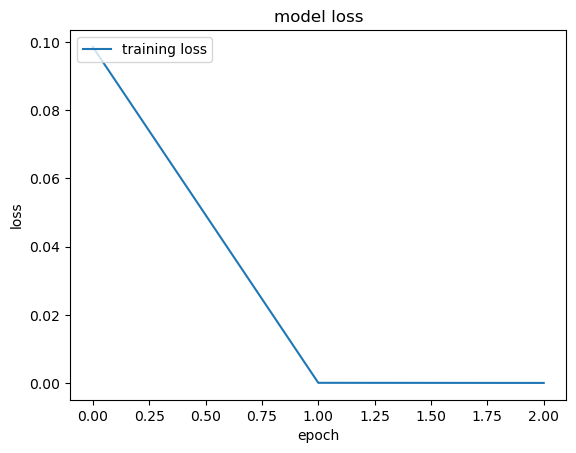

In [83]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss'], loc='upper left')

### Get Model Predictions of the whole Dataset

In [84]:
x=dataset
trure_targets = labels
predictions =[]
predX=VGG16model.predict(x)

for pred in predX:
    #print(pred.shape)
    
    if(pred>0 and pred<=0.5):
        print(pred)
        predictions.append(0)
    else:
        predictions.append(1)
    
predictions =  np.asarray(predictions)



79/79 [==============================] - 10s 122ms/step
[1.7544707e-07]
[3.801757e-07]
[1.6699317e-08]
[6.5614324e-07]
[1.8972017e-07]
[3.6668865e-07]
[1.3353378e-08]
[2.4962085e-07]
[2.0640147e-08]
[4.570295e-07]
[4.012177e-05]
[4.307727e-06]
[1.0920979e-07]
[1.3353378e-08]
[7.799813e-08]
[6.978557e-08]
[2.295471e-08]
[1.8182207e-06]
[6.2975397e-07]
[1.3579576e-07]
[4.1969774e-06]
[6.2975397e-07]
[4.8526115e-08]
[5.434584e-08]
[4.6162143e-08]
[7.694501e-07]
[2.9321023e-07]
[8.6736804e-08]
[9.511955e-07]
[2.395254e-07]
[2.6747813e-07]
[3.782542e-08]
[1.3277864e-07]
[5.2317995e-07]
[1.3277864e-07]
[1.3353378e-08]
[2.7891943e-08]
[2.5044654e-08]
[4.570295e-07]
[1.7544707e-07]
[1.3579576e-07]
[2.395254e-07]
[6.1295214e-07]
[6.878178e-07]
[1.1604104e-06]
[6.151147e-08]
[1.3579576e-07]
[2.4426595e-07]
[2.387926e-07]
[1.482088e-06]
[4.4048228e-08]
[6.0683686e-07]
[4.012177e-05]
[1.3277864e-07]
[6.978557e-08]
[1.5049565e-07]
[1.5955067e-08]
[2.0640147e-08]
[1.846181e-07]
[1.1604104e-06]
[1.75

#### summary of the predictions

In [85]:
print(predictions.shape)
print(predictions[2000])
print(labels[2000])

print(predictions[2012])
print(labels[2012])

(2511,)
0
0
1
1


<Axes: >

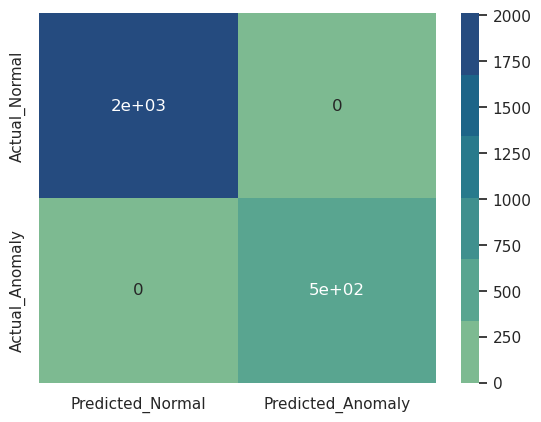

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
colorMap = sns.color_palette("crest")  



data = confusion_matrix(labels, predictions,labels=[0,1])
df = pd.DataFrame(data,index = ["Actual_Normal","Actual_Anomaly"],columns=['Predicted_Normal','Predicted_Anomaly'],dtype=int)
sns.heatmap(df, annot=True, cmap=colorMap)

In [87]:
#df = pd.DataFrame(data,index = ["Actual_Normal","Actual_Anomaly"],columns=['Predicted_Normal','Predicted_Anomaly'],dtype=int)
df

,Predicted_Normal,Predicted_Anomaly
Actual_Normal,2012,0
Actual_Anomaly,0,499


#### Save the model

In [88]:
 model.save('VGG16model.h5')

### Load the trained model

In [89]:
from keras.models import load_model
model = load_model('VGG16model.h5')
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

# Explainability of the feature extractors

## SHAP


In [90]:
!pip install shap

In [91]:
import shap

class_names = ['Normal',"Anomaly"]

class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(VGG16model, masker_blur, output_names=class_names)
  
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[0:1], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip)

  0%|          | 0/4998 [00:00<?, ?it/s]

Partition explainer: 2it [00:56, 56.67s/it]               


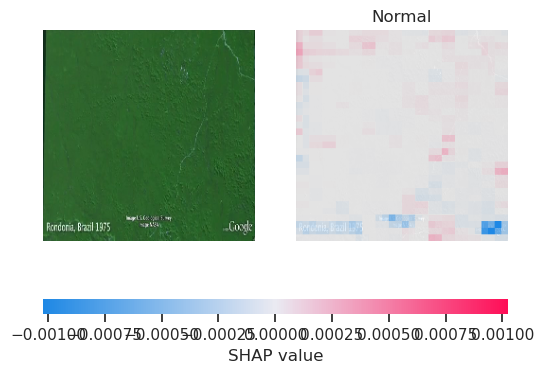

In [92]:
shap.image_plot(shap_values_fine,dataset[0:1]/255.0,[["Normal"]])

  0%|          | 0/4998 [00:00<?, ?it/s]

Partition explainer: 2it [00:33, 33.89s/it]               


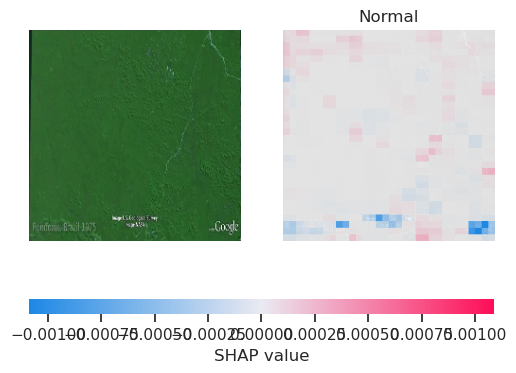

In [94]:
masker_blur = shap.maskers.Image("blur(128,128)", dataset[101].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(VGG16model, masker_blur, output_names=class_names)
  
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[100:101], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip)
shap.image_plot(shap_values_fine,dataset[100:101]/255.0,[["Normal"]])

  0%|          | 0/4998 [00:00<?, ?it/s]

Partition explainer: 2it [00:33, 33.95s/it]               


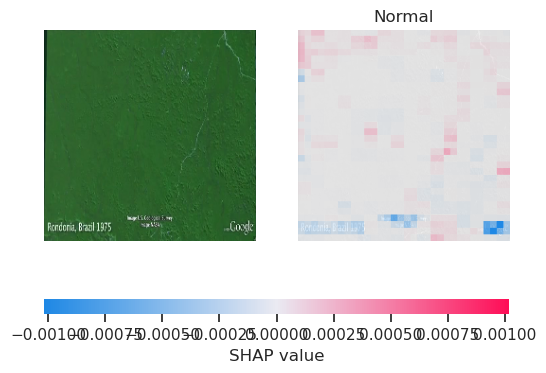

In [95]:
masker_blur = shap.maskers.Image("blur(128,128)", dataset[1901].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(VGG16model, masker_blur, output_names=class_names)
  
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[1900:1901], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip)
shap.image_plot(shap_values_fine,dataset[1900:1901]/255.0,[["Normal"]])

  0%|          | 0/4998 [00:00<?, ?it/s]

Partition explainer: 2it [00:34, 34.57s/it]               


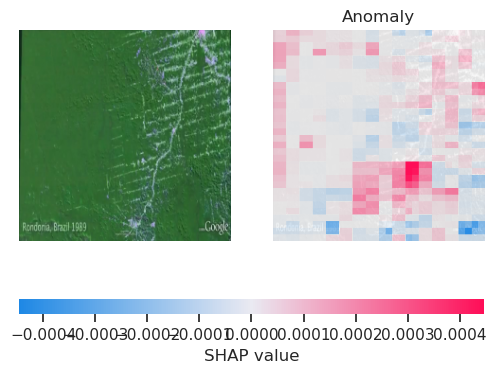

In [129]:
masker_blur = shap.maskers.Image("blur(128,128)", dataset[2251].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(VGG16model, masker_blur, output_names=class_names)
  
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[2250:2251], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip)
shap.image_plot(shap_values_fine,dataset[2250:2251]/255.0,[["Anomaly"]])

  0%|          | 0/4998 [00:00<?, ?it/s]

Partition explainer: 2it [00:34, 34.79s/it]               


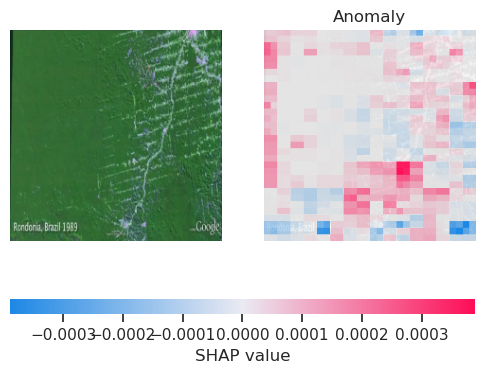

In [130]:
masker_blur = shap.maskers.Image("blur(128,128)", dataset[2451].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(VGG16model, masker_blur, output_names=class_names)
  
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[2450:2451], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip)
shap.image_plot(shap_values_fine,dataset[2450:2451]/255.0,[["Anomaly"]])

## LIME

In [122]:
!pip install lime

In [123]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [124]:

explainer = lime_image.LimeImageExplainer(random_state=42)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


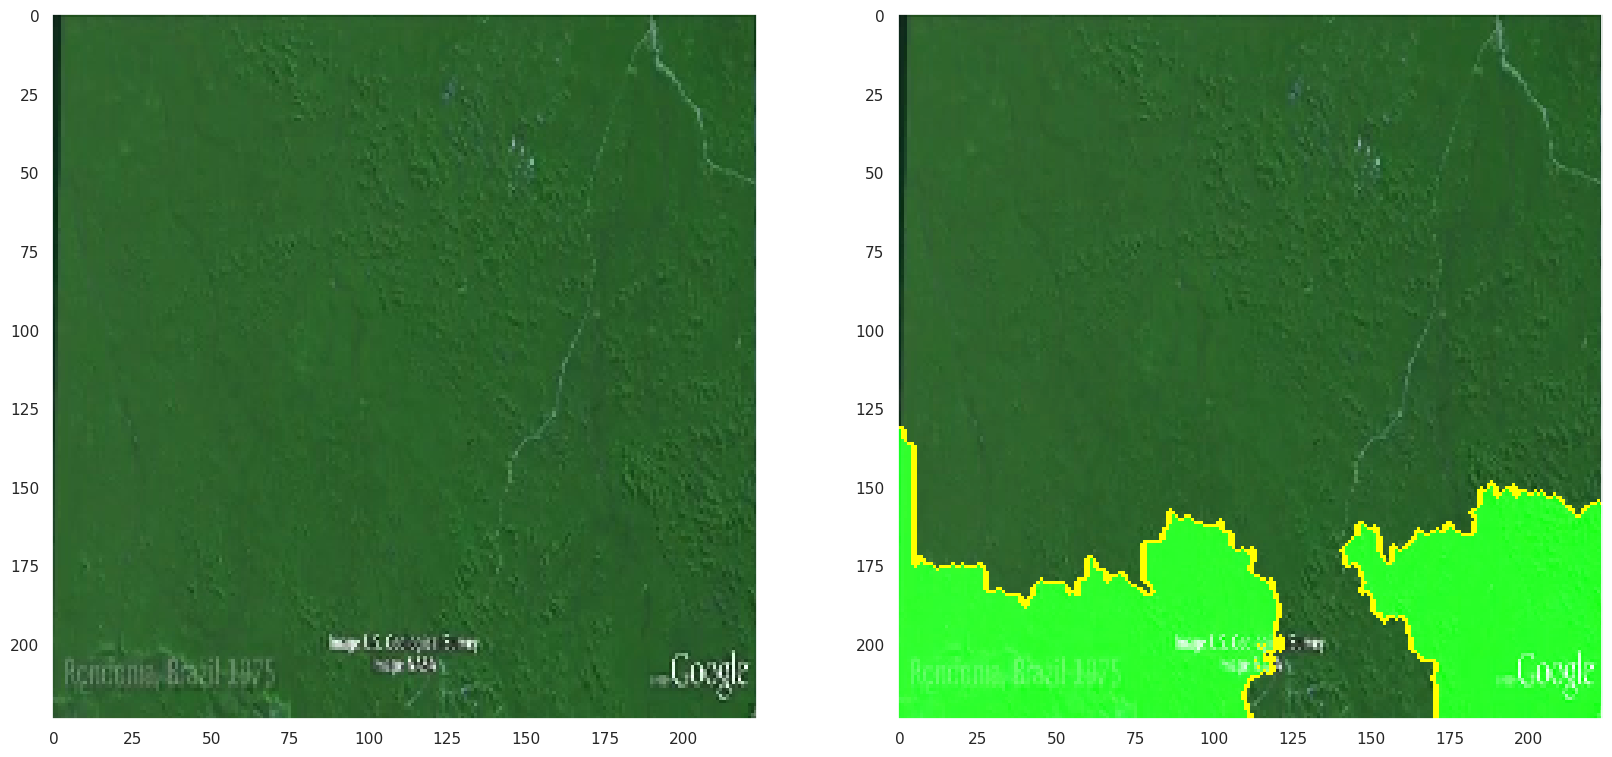

In [125]:
#100th
explanation = explainer.explain_instance(
         dataset[99], 
         model.predict
)

image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[99])
plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


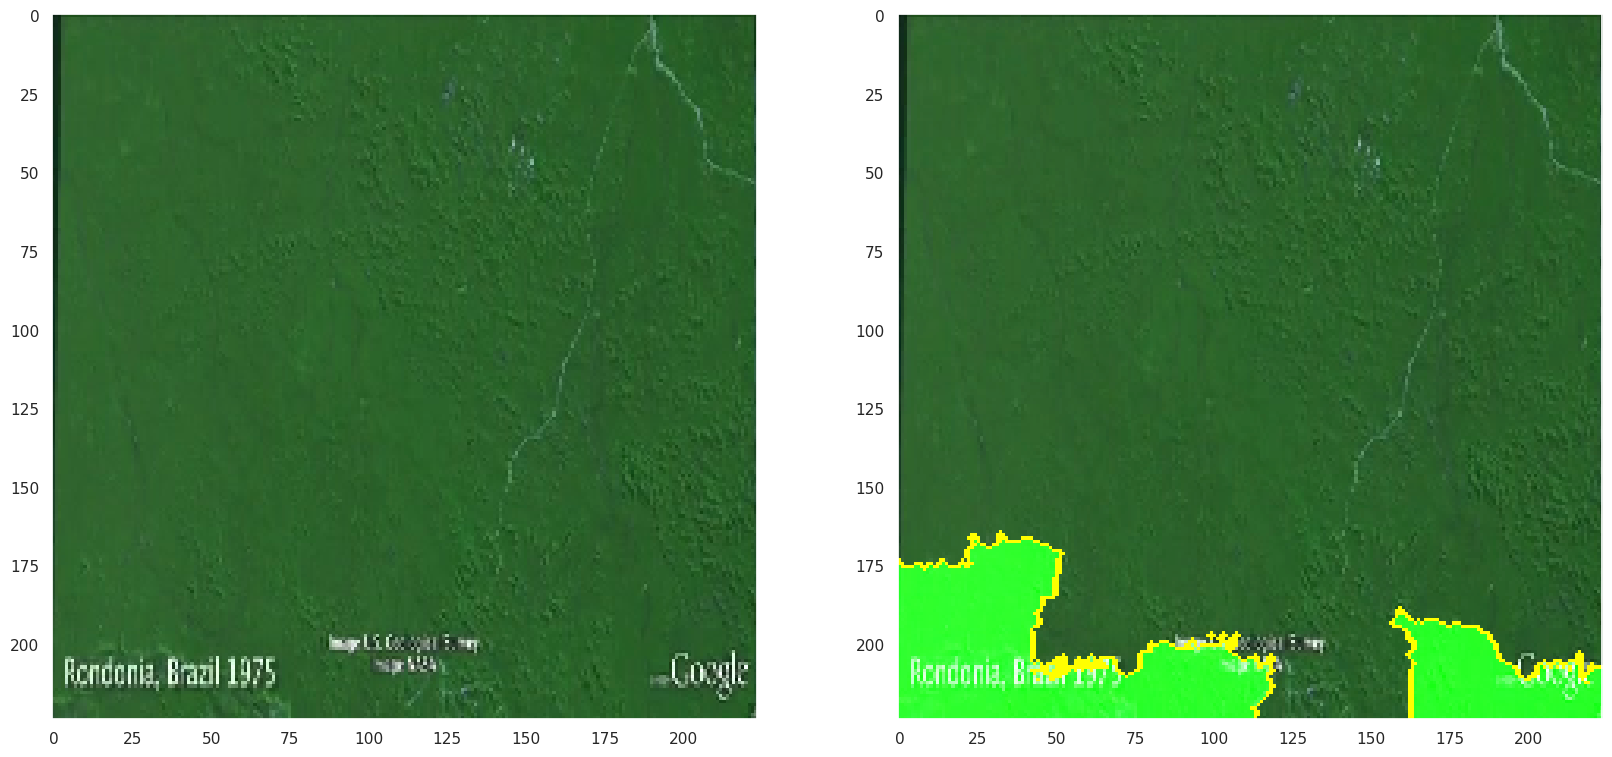

In [126]:
#1900th
explanation = explainer.explain_instance(
         dataset[1899], 
         model.predict
)

image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[1899])
plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


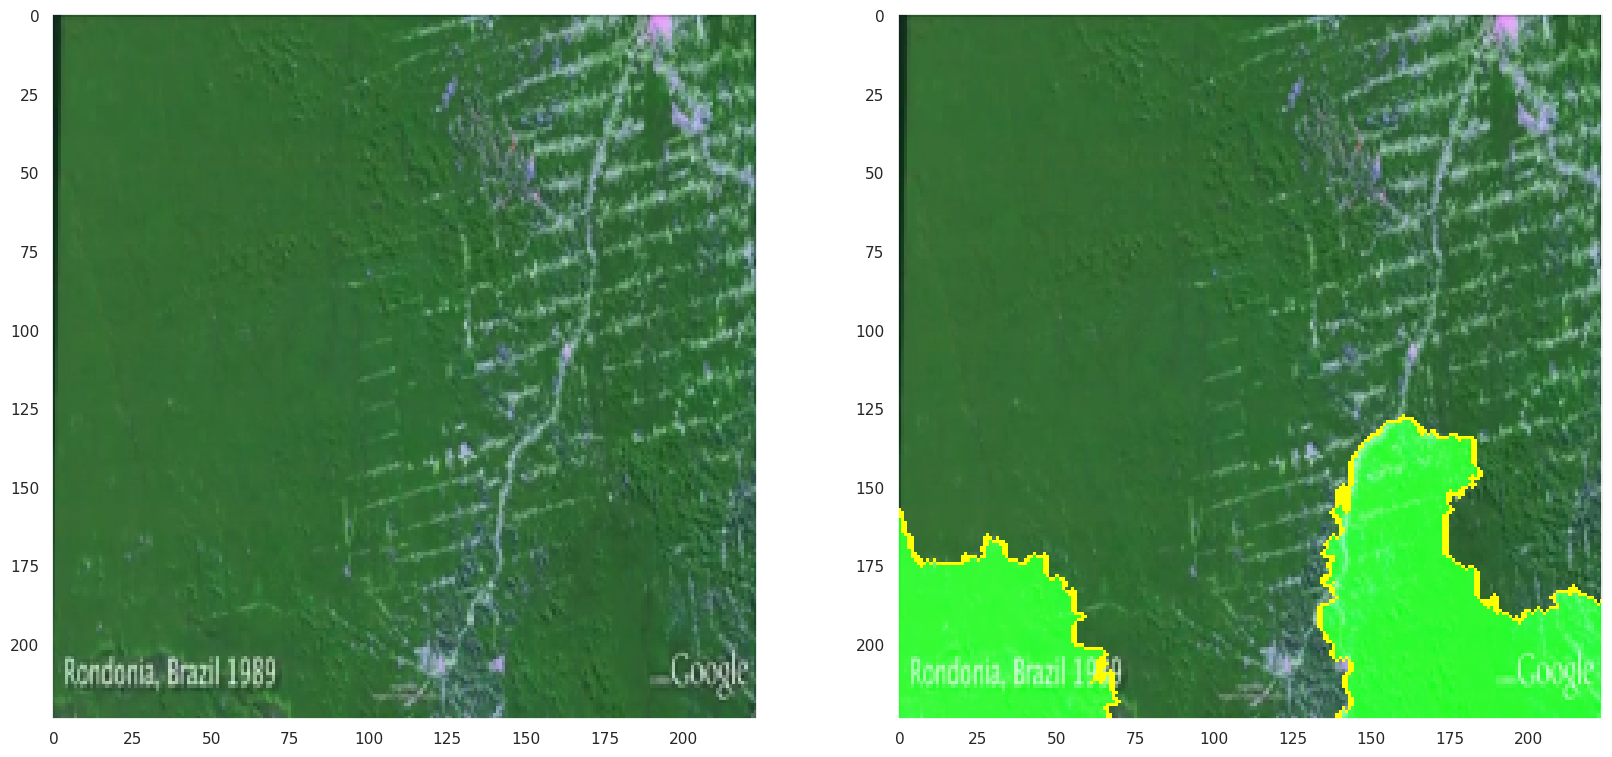

In [127]:
#2250th
explanation = explainer.explain_instance(
         dataset[2249], 
         model.predict
)

image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[2249])
plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


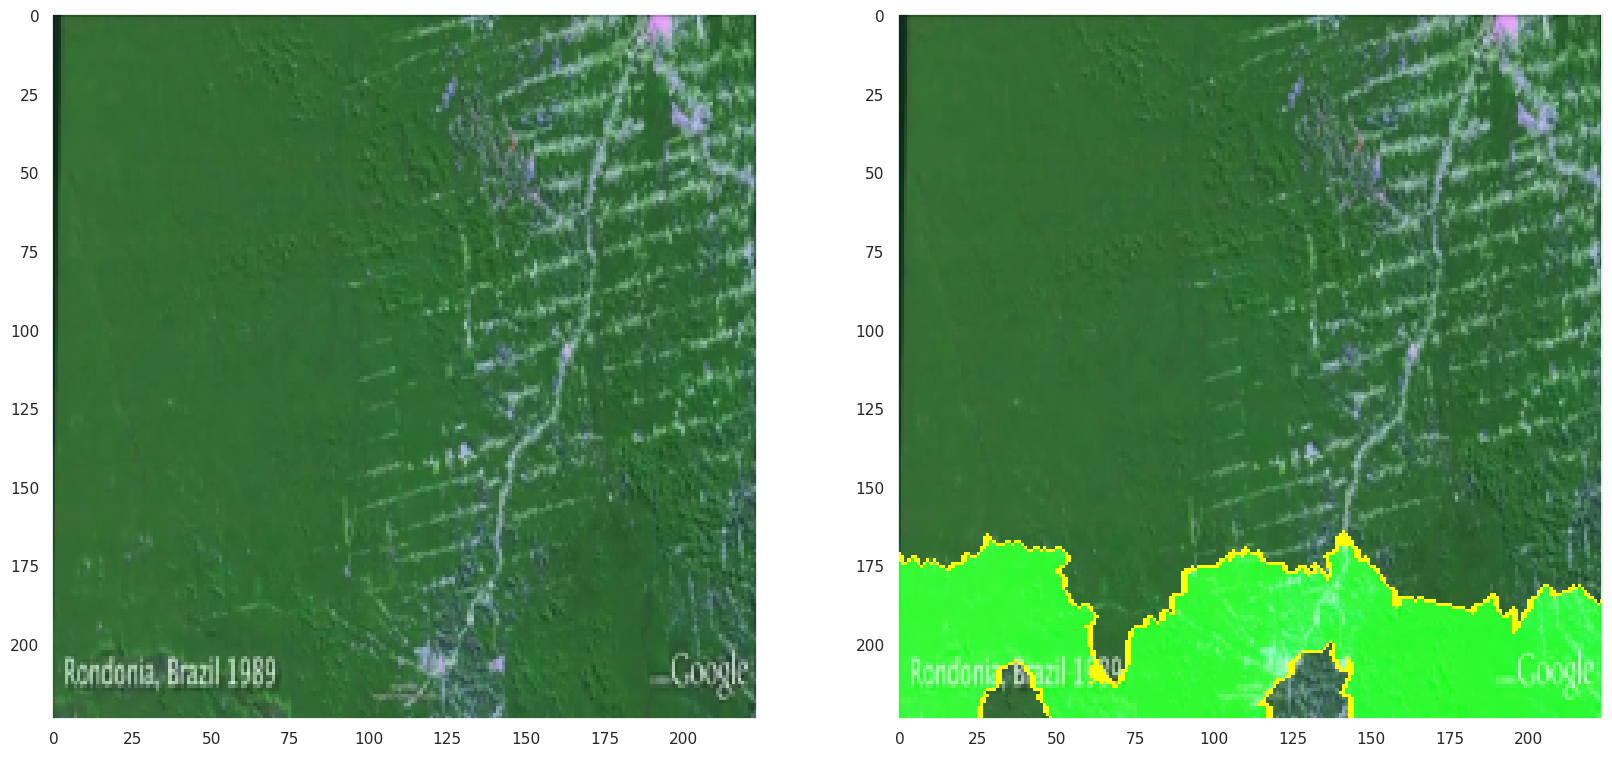

In [128]:
#2450th
explanation = explainer.explain_instance(
         dataset[2449], 
         model.predict
)

image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[2449])
plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))